# Data Preparation

In [16]:
import pandas as pd
import plotly.graph_objects as go

from data_preparation.additional_data_preparation import prepare_covid_dataset,get_mobility_data
from paths import *

In [17]:
from data_preparation.spatio_temporal_filtering import read_bd_data

metadata, series, metadata_region, region_series, metadata_country, country_series = read_bd_data()

In [18]:
time_series_bd = country_series

In [9]:
covid_cases,covid_period_start,covid_period_end = prepare_covid_dataset()

In [5]:
from mobility import bd_lockdown_dates

bd_lockdown_dates_df = pd.DataFrame(np.array(bd_lockdown_dates).reshape(-1,2),columns=['start_date','end_date'])
covid_cases['lockdown'] = 0
for idx,date in bd_lockdown_dates_df.iterrows():
    covid_cases.loc[date.start_date:date.end_date,'lockdown'] = 1

In [6]:
covid_cases

,confirmed,deaths,lockdown
2020-03-01,0.0,0.0,0
2020-03-02,0.0,0.0,0
2020-03-03,0.0,0.0,0
2020-03-04,0.0,0.0,0
2020-03-05,0.0,0.0,0
...,...,...,...
2022-02-24,1516.0,10.0,0
2022-02-25,1406.0,11.0,0
2022-02-26,759.0,8.0,0
2022-02-27,864.0,9.0,0


In [7]:
mobility = get_mobility_data()

In [8]:
mobility

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2020-02-15,4,6,10,7,8,1
2020-02-16,3,3,5,4,8,0
2020-02-17,1,4,3,2,5,1
2020-02-18,2,3,2,3,5,1
2020-02-19,1,1,3,2,5,1
...,...,...,...,...,...,...
2022-04-29,76,122,104,104,99,6
2022-04-30,68,116,126,106,37,7
2022-05-01,65,116,140,83,-16,12


In [10]:
covid_cases_two_year = covid_cases

mobility_two_year = mobility[covid_period_start:covid_period_end]
# mobility_two_year = mobility.shift(30)[covid_period_start:covid_period_end]

# Experiment

In [20]:
from exploration import yearly_seasonal_decomposition_bd

In [11]:
pm_two_year = time_series_bd[covid_period_start:covid_period_end]
pm_two_year_stationary = yearly_seasonal_decomposition_bd(pm_two_year)

pm_two_year_stationary

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [21]:
from data_preparation.handling_missing_entries import FillMissingFromCombined, FillMissingFromNeighbors

time_series_bd_impute = time_series_bd.apply(FillMissingFromCombined).iloc[:,0]['2017-03-01':'2022-02-28']
time_series_bd_impute = time_series_bd_impute.resample('D').mean()
# time_series_bd_impute = FillMissingFromNeighbors(time_series_bd_impute)

time_series_stationary = yearly_seasonal_decomposition_bd(time_series_bd_impute)
# time_series_stationary = time_series_stationary.resample('D').mean()
# time_series_stationary = time_series_stationary[covid_period_start:covid_period_end]
time_series_stationary = time_series_stationary-time_series_stationary.min()
time_series_stationary

,0
time,
2017-03-01,120.545248
2017-03-02,89.995248
2017-03-03,74.809892
2017-03-04,62.885965
2017-03-05,48.421329
...,...
2022-02-24,64.594414
2022-02-25,63.773164
2022-02-26,77.011081


In [13]:
time_series_stationary.describe()
# (time_series_stationary-time_series_stationary.min()).describe()

,0
count,1826.000000
mean,73.857485
std,15.794410
min,0.000000
25%,65.766703
50%,73.792657
75%,82.439654
max,151.302186


/home/asif/PycharmProjects/Air_Quality_Analysis/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



<StemContainer object of 3 artists>

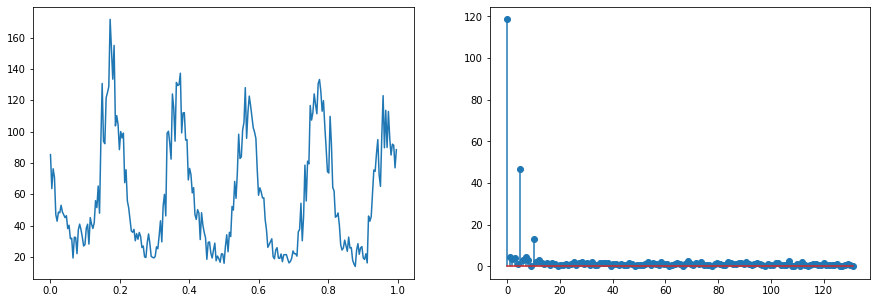

In [42]:
# Frequency and sampling rate
Fs = 262 # sampling rate
# Fs = 1826 # sampling rate
# Fs = 43824 # sampling rate
t = np.arange(0,1,1/Fs)
# Sine function
y = time_series_bd_impute.values
# Perform Fourier transform using scipy
from scipy import fftpack
y_fft = fftpack.fft(y)
# Plot data
n = np.size(t)
fr = Fs/2 * np.linspace(0,1,int(n/2))
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(t, y)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain

In [47]:
y_m
# sorted(y_m)[::-1]

array([118.57540579,   4.76103309,   3.47865611,   4.05370026,
         1.32165071,  46.64386256,   3.20209391,   4.34428159,
         3.28802129,   0.42078171,  13.26169012,   2.18588522,
         3.13574915,   1.41875032,   1.00734001,   1.88193112,
         0.87272857,   1.84622647,   1.40140071,   0.38135329,
         0.88092001,   0.67637658,   1.31021631,   0.67371022,
         1.26295897,   2.2868616 ,   0.88383428,   1.51127123,
         2.28202979,   1.08145795,   1.86782551,   0.78916806,
         2.07668938,   0.83243065,   0.66789683,   1.45958084,
         1.81320506,   1.65298599,   1.51626812,   0.13681103,
         1.34404994,   1.11308246,   0.79867516,   0.98141006,
         0.67091386,   0.82812929,   1.56466575,   1.25415036,
         0.3718005 ,   0.53646329,   0.79297654,   0.81171736,
         1.02426366,   2.32992869,   0.80756462,   1.8192822 ,
         1.10533815,   0.88151948,   2.01345142,   1.38997461,
         1.17205187,   0.31650381,   0.71847267,   1.39

In [86]:
time_series_bd_daily =  time_series_bd.resample('D').mean()

In [87]:
pm_two_year = pm_two_year.resample('D').mean()
# pm_two_year = time_series_stationary.resample('D').mean().iloc[:,0]
# pm_two_year = pm_two_year-pm_two_year.min()
# pm_two_year = pm_two_year.fillna(pm_two_year.median()).median(axis=1)
pm_two_year.name = 'pm reading'

In [88]:
pm_two_year

,Bangladesh
time,
2020-03-01,83.549167
2020-03-02,74.544167
2020-03-03,62.414167
2020-03-04,53.105417
2020-03-05,54.732083
...,...
2022-02-24,70.572917
2022-02-25,69.751667
2022-02-26,82.989583


In [ ]:
from exploration import PLotlyTimeSeries

PLotlyTimeSeries(pm_two_year.to_frame())

In [ ]:
PLotlyTimeSeries(time_series_stationary)
# PLotlyTimeSeries(time_series_stationary.resample('D').mean())

In [83]:
time_series_stationary

,0
time,
2017-03-01,120.545248
2017-03-02,89.995248
2017-03-03,74.809892
2017-03-04,62.885965
2017-03-05,48.421329
...,...
2022-02-24,64.594414
2022-02-25,63.773164
2022-02-26,77.011081


In [13]:
time_series_stationary_cp = time_series_stationary.copy()

In [19]:
low_mobility_days = mobility.index[(mobility.workplaces<0) & (mobility.transit_stations<0)]
# mobility_days = mobility.index[(mobility.workplaces<0) | (mobility.transit_stations<0) | (mobility.parks<0)]
low_mobility_days

DatetimeIndex(['2020-03-06', '2020-03-17', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29',
               ...
               '2021-07-24', '2021-07-25', '2021-07-26', '2021-07-27',
               '2021-07-28', '2021-07-29', '2021-07-30', '2021-08-02',
               '2021-08-03', '2021-08-04'],
              dtype='datetime64[ns]', name='date', length=233, freq=None)

In [36]:
time_series_stationary_cp['low_mobility_days'] = False

In [37]:
for mobility_day in low_mobility_days:
    time_series_stationary_cp.loc[mobility_day,'low_mobility_days'] = True
time_series_stationary_cp.columns = ['PM2.5 Concentration','low_mobility_days']

In [38]:
time_series_stationary_cp

,PM2.5 Concentration,low_mobility_days
time,,
2017-03-01,120.545248,False
2017-03-02,89.995248,False
2017-03-03,74.809892,False
2017-03-04,62.885965,False
2017-03-05,48.421329,False
...,...,...
2022-02-24,64.594414,False
2022-02-25,63.773164,False
2022-02-26,77.011081,False


In [39]:
fig = px.scatter(time_series_stationary_cp['2019-03':'2022-02'],x=time_series_stationary['2019-03':'2022-02'].index,y='PM2.5 Concentration',color='low_mobility_days',color_discrete_map={True:'royalblue',False:'#E759AC'}) #rougepink
fig.update_layout(
    autosize=False, width=1500, height=600,
    title="",
    xaxis_title="Time",
    font=dict(size=27, color="#3D3C3A"),
    legend_orientation='h'
)
fig.show()

In [66]:
time_series_stationary_cp

,reading,low_mobility_days
time,,
2020-03-06,49.500394,True
2020-03-17,55.789143,True
2020-03-22,32.653727,True
2020-03-23,57.342643,True
2020-03-24,64.802226,True
...,...,...
2021-07-29,58.866648,True
2021-07-30,61.716231,True
2021-08-02,74.230872,True


# Statistical Significance

In [62]:
from scipy import stats

In [67]:
group_a, group_b = time_series_stationary_cp.reading[time_series_stationary_cp.low_mobility_days], time_series_stationary_cp.reading[~time_series_stationary_cp.low_mobility_days]
t_value, p_value = stats.ttest_ind(group_a, group_b)
t_value, p_value

(-4.819131088227403, 1.5611979022131594e-06)

In [24]:
time_series_stationary['2018-03':'2018-08'].mean(),time_series_stationary['2019-03':'2019-08'].mean(),time_series_stationary['2020-03':'2020-08'].mean(),time_series_stationary['2021-03':'2021-08'].mean()

(0    79.433322
 dtype: float64,
 0    72.763626
 dtype: float64,
 0    67.358336
 dtype: float64,
 0    76.708674
 dtype: float64)

In [74]:
# regular = time_series_stationary['2017-04':'2020-03']
# regular = pd.concat((time_series_stationary['2017-03':'2017-08'],time_series_stationary['2018-03':'2018-08'],time_series_stationary['2019-03':'2019-08']))
regular = pd.concat((time_series_stationary['2017-03':'2017-11'],time_series_stationary['2018-03':'2018-11'],time_series_stationary['2019-03':'2019-11'],time_series_stationary['2021-03':'2021-11']))
# non_regular = time_series_stationary['2020-04':'2022-03']
# non_regular = pd.concat((time_series_stationary['2020-03':'2020-08'],time_series_stationary['2021-03':'2021-08']))
non_regular = time_series_stationary['2020-03':'2022-11']

In [75]:
group_a, group_b = regular.dropna(), non_regular.dropna()

In [77]:
group_a.mean(), group_b.mean()

(0    76.505285
 dtype: float64,
 0    70.27367
 dtype: float64)

In [76]:
t_value, p_value = stats.ttest_ind(group_a, group_b)

t_value, p_value

(array([9.45228766]), array([9.77286342e-21]))

# Correlation Analysis

In [81]:
mobility_covid_correlation = mobility_two_year.apply(lambda mobility_type : mobility_type.corr(covid_cases_two_year.lockdown))
mobility_covid_correlation

retail_and_recreation   -0.374650
grocery_and_pharmacy    -0.252039
parks                   -0.341118
transit_stations        -0.396158
workplaces              -0.375540
residential              0.599681
dtype: float64

In [91]:
mobility_pm_correlation = mobility_two_year.shift(0).apply(lambda mobility_type : mobility_type.corr(pm_two_year.Bangladesh))
# mobility_pm_correlation_shift_30 = mobility_two_year.shift(30).apply(lambda mobility_type : mobility_type.corr(pm_two_year))
mobility_pm_correlation

retail_and_recreation    0.387242
grocery_and_pharmacy     0.349897
parks                    0.396709
transit_stations         0.434335
workplaces               0.439753
residential             -0.392905
dtype: float64

In [22]:
time_series_stationary_for_mobility = time_series_stationary.iloc[:,0]
time_series_stationary_for_mobility['2020-03-01':'2022-02-28']

time
2020-03-01    77.570664
2020-03-02    71.716227
2020-03-03    59.586227
2020-03-04    50.277477
2020-03-05    51.904144
                ...    
2022-02-24    64.594414
2022-02-25    63.773164
2022-02-26    77.011081
2022-02-27    74.817748
2022-02-28    85.650811
Freq: D, Name: 0, Length: 730, dtype: float64

In [23]:
mobility_stationary_pm_correlation = mobility_two_year.shift(7).apply(lambda mobility_type : mobility_type.corr(time_series_stationary_for_mobility))
mobility_stationary_pm_correlation

retail_and_recreation   -0.125681
grocery_and_pharmacy    -0.103856
parks                   -0.147299
transit_stations        -0.123742
workplaces              -0.130375
residential              0.057379
dtype: float64

In [24]:
mobility_stationary_pm_correlation_list = []

for i in range(14):
    mobility_stationary_pm_correlation = mobility_two_year.apply(lambda mobility_type : mobility_type.corr(time_series_stationary_for_mobility.shift(-i)))
    mobility_stationary_pm_correlation_list.append(mobility_stationary_pm_correlation)

In [25]:
mobility_stationary_pm_correlation_df = pd.concat(mobility_stationary_pm_correlation_list,axis=1).T

In [26]:
mobility_stationary_pm_correlation_df

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,-0.068066,-0.045084,-0.102771,-0.075833,-0.077963,0.011154
1,-0.067798,-0.043819,-0.099967,-0.074444,-0.079689,0.012765
2,-0.077751,-0.053353,-0.108313,-0.082192,-0.079008,0.017251
3,-0.093312,-0.070942,-0.123388,-0.095640,-0.069415,0.017984
4,-0.105237,-0.083153,-0.133852,-0.105212,-0.081829,0.030547
5,-0.118001,-0.094127,-0.142600,-0.116244,-0.108140,0.054991
6,-0.123472,-0.099931,-0.145742,-0.121466,-0.123030,0.062699
7,-0.125681,-0.103856,-0.147299,-0.123742,-0.130375,0.057379
8,-0.119309,-0.097991,-0.142803,-0.118048,-0.121639,0.044957
9,-0.114709,-0.092562,-0.135508,-0.117464,-0.112952,0.030180


In [19]:
mobility_stationary_pm_correlation_df.abs().idxmax()

retail_and_recreation    7
grocery_and_pharmacy     7
parks                    7
transit_stations         7
workplaces               7
residential              6
dtype: int64

In [30]:
mobility_stationary_pm_correlation_df.columns = ['Retail & <br> Recreation', 'Grocery & <br> Pharmacy', 'Parks',
       'Transit <br> Stations', 'Workplaces', 'Residential']

In [32]:
fig = go.Figure(data=go.Heatmap(
    z=mobility_stationary_pm_correlation_df.T, y=mobility_stationary_pm_correlation_df.columns, x=mobility_stationary_pm_correlation_df.index,
    colorscale='icefire',
    zmin=-.2, zmax=.2,
    reversescale=True
))
fig.update_layout(
    autosize=False, width=1600, height=800,
    title="",
    xaxis_title="Lag Days", yaxis_title="Mobility Type",
    font=dict(size=24, color="#3D3C3A"
              )
)
fig.show(config={'displayModeBar': False, 'responsive': True})

In [179]:
# pd.concat((time_series_stationary_for_mobility.shift(-7),mobility_two_year),axis=1).dropna().resample('W').mean().pct_change()
# pd.concat((time_series_stationary_for_mobility.shift(-7),mobility_two_year),axis=1).dropna()['2020-03':'2020-08'].diff().sum()
avg_2020 = pd.concat((time_series_stationary_for_mobility.shift(0),mobility_two_year),axis=1).dropna()['2020-03':'2020-11'].mean()
avg_2021 = pd.concat((time_series_stationary_for_mobility.shift(0),mobility_two_year),axis=1).dropna()['2021-03':'2021-11'].mean()

In [156]:
time_series_stationary_for_mobility['2019-03':'2019-11'].mean()

73.18452341622708

In [180]:
avg_2_year = pd.concat((avg_2021,avg_2020),axis=1)
avg_2_year.iloc[0] = (avg_2_year.iloc[0]-73.18)/73.18*100
avg_2_year.diff(axis=1)

,0,1
0,NaN,-9.924937
retail_and_recreation,NaN,-49.276364
grocery_and_pharmacy,NaN,-65.432727
parks,NaN,-37.083636
transit_stations,NaN,-54.840000
workplaces,NaN,-30.454545
residential,NaN,4.040000


In [16]:
covid_cases_mobility_correlation = covid_cases_two_year.apply(lambda covid_cases_type : covid_cases_type.corr(mobility_two_year.residential))
covid_cases_mobility_correlation

confirmed    0.119497
deaths       0.197612
lockdown     0.599681
dtype: float64

In [17]:
covid_cases_pm_correlation = covid_cases_two_year.shift(0).apply(lambda covid_cases_type : covid_cases_type.corr(pm_two_year))
covid_cases_pm_correlation_shift_30 = covid_cases_two_year.shift(30).apply(lambda covid_cases_type : covid_cases_type.corr(pm_two_year))
covid_cases_pm_correlation_shift_30

confirmed   -0.296861
deaths      -0.387428
lockdown    -0.461974
dtype: float64

In [169]:
# fig = px.line(mobility_two_year, x=mobility_two_year.index, y=mobility_two_year.columns)
fig = px.line(mobility_two_year.resample('W').mean(), x=mobility_two_year.resample('W').mean().index, y=mobility_two_year.columns)
fig.update_layout(legend_orientation='h')
fig.show()

In [19]:
mobility_two_year_stacked = mobility_two_year.stack()
mobility_two_year_stacked.name = 'activity'
mobility_two_year_stacked = mobility_two_year_stacked.to_frame()
mobility_two_year_stacked['type'] = mobility_two_year_stacked.index.get_level_values(1)
mobility_two_year_stacked.index = mobility_two_year_stacked.index.get_level_values(0)

In [20]:
mobility_two_year_stacked_pm = mobility_two_year_stacked.join(pm_two_year)
# mobility_two_year_stacked_pm

In [ ]:
df = mobility_two_year_stacked_pm
fig = px.density_contour(df, x="activity", y="pm reading", marginal_x="histogram", marginal_y="histogram",color='type')
fig.show()

In [29]:
import plotly.express as px
fig = px.line(covid_cases, x=covid_cases.index, y=covid_cases.columns)
# fig = px.line(np.log(covid_cases+1), x=covid_cases.index, y=covid_cases.columns)
fig.update_layout(legend_orientation='h',font_size=15)
fig.show()

In [111]:

fig = go.Figure()
fig.add_trace()

fig.show()

fig = go.Figure()
fig.add_trace()

fig.show()

TypeError: add_trace() missing 1 required positional argument: 'trace'

In [103]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)
fig.add_trace(
    go.Scatter(x=covid_cases.index, y=covid_cases.confirmed, fill='tozeroy', mode='lines', line_color='indigo'),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=covid_cases.index, y=covid_cases.deaths, fill='tozeroy', mode='lines', line_color='red'),
    row=2, col=1)

fig.add_trace(
    go.Scatter(x=covid_cases.index, y=covid_cases.lockdown, fill='tozeroy', mode='lines', line_color='lightskyblue'),
    row=3, col=1)

fig.update_layout(height=600, width=1800,
                  title_text="Stacked Subplots with Shared X-Axes", legend_orientation='h',font_size=15)

fig.update_yaxes(title_text="confirmed cases", row=1, col=1)
fig.update_yaxes(title_text="death cases", row=2, col=1)
fig.update_yaxes(title_text="lockdown period", row=3, col=1)
fig.show()

In [90]:
mobility_two_year.columns

Index(['retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

In [100]:
fig = make_subplots(rows=6, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

for i,mobility_type in enumerate(mobility_two_year[['retail_and_recreation', 'parks', 'grocery_and_pharmacy',  'workplaces','transit_stations',  'residential']]):
    fig.add_trace(
        # go.Scatter(x=mobility_two_year.index, y=mobility_two_year[mobility_type], fill='tozeroy', mode='lines', line_color='indigo'),
        go.Scatter(x=mobility_two_year.index, y=mobility_two_year[mobility_type], mode='lines'),
        row=i+1, col=1)
    fig.update_yaxes(title_text=mobility_type, row=i+1, col=1, range=[-100, 100],)

fig.update_layout(height=900, width=1800,
                  title_text="Stacked Subplots with Shared X-Axes", legend_orientation='h',font_size=12)

fig.show()

In [23]:
covid_cases_two_year_stacked = np.log(covid_cases+1).stack()
covid_cases_two_year_stacked.name = 'case counts'
covid_cases_two_year_stacked = covid_cases_two_year_stacked.to_frame()
covid_cases_two_year_stacked['type'] = covid_cases_two_year_stacked.index.get_level_values(1)
covid_cases_two_year_stacked.index = covid_cases_two_year_stacked.index.get_level_values(0)

In [24]:
# covid_cases_two_year_stacked_pm = covid_cases_two_year_stacked.join(np.log(pm_two_year+1))
covid_cases_two_year_stacked_pm = covid_cases_two_year_stacked.join(np.log(pm_two_year+100))
covid_cases_two_year_stacked_pm

,case counts,type,pm reading
2020-03-01,0.000000,confirmed,5.209416
2020-03-01,0.000000,deaths,5.209416
2020-03-01,0.000000,lockdown,5.209416
2020-03-02,0.000000,confirmed,5.161292
2020-03-02,0.000000,deaths,5.161292
...,...,...,...
2022-02-27,2.302585,deaths,5.188821
2022-02-27,0.000000,lockdown,5.188821
2022-02-28,6.800170,confirmed,5.229956
2022-02-28,1.609438,deaths,5.229956


In [112]:
mobility_pm_correlation.name = 'mobility_pm_correlation'
mobility_pm_correlation_shift_30.name = 'mobility_pm_correlation_shift_30'
mobility_pm_correlations = pd.concat((mobility_pm_correlation,mobility_pm_correlation_shift_30),axis=1)

In [113]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=mobility_pm_correlation.index,
    y=mobility_pm_correlation,
    name='mobility_pm_correlation',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=mobility_pm_correlation_shift_30.index,
    y=mobility_pm_correlation_shift_30,
    name='mobility_pm_correlation_shift_30',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-0, legend_orientation = 'h')
fig.show()

In [27]:
df = covid_cases_two_year_stacked_pm
fig = px.density_contour(df, x="case counts", y="pm reading", marginal_x="histogram", marginal_y="histogram",color='type')
fig.show()

In [28]:
import statsmodels.api as sm
pm_covid_mobility = pd.concat((pm_two_year.fillna(0),covid_cases_two_year,mobility_two_year),axis=1)
# pm_covid_mobility
model = sm.OLS(pm_covid_mobility['pm reading'], pm_covid_mobility.drop('pm reading', axis=1))
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             pm reading   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              291.6
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                   1.82e-233
Time:                        16:24:06   Log-Likelihood:                         -3532.2
No. Observations:                 730   AIC:                                      7082.
Df Residuals:                     721   BIC:                                      7124.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [5]:
mobility.to_csv('dhaka_mobility.csv')